# Trees

## 1. Prepare the data

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix, classification_report

In [2]:
df_football = pd.read_pickle('data/df_data_cleaned.csv')
df_football

,Name,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31.0,94.0,94.0,FC Barcelona,1.105e+08,5.65e+07,2202.0,0.0,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33.0,94.0,94.0,Juventus,7.7e+07,4.05e+07,2228.0,1.0,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26.0,92.0,93.0,Paris Saint-Germain,1.185e+08,2.9e+07,2143.0,1.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,K. De Bruyne,27.0,91.0,92.0,Manchester City,1.02e+08,3.55e+07,2281.0,1.0,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
4,E. Hazard,27.0,91.0,91.0,Chelsea,9.3e+07,3.4e+07,2142.0,1.0,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
5,L. Modrić,32.0,91.0,91.0,Real Madrid,6.7e+07,4.2e+07,2280.0,1.0,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
6,L. Suárez,31.0,91.0,91.0,FC Barcelona,8e+07,4.55e+07,2346.0,1.0,5.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
7,Sergio Ramos,32.0,91.0,91.0,Real Madrid,5.1e+07,3.8e+07,2201.0,1.0,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
8,R. Lewandowski,29.0,90.0,90.0,FC Bayern München,7.7e+07,2.05e+07,2152.0,1.0,4.0,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
9,T. Kroos,28.0,90.0,90.0,Real Madrid,7.65e+07,3.55e+07,2190.0,1.0,4.0,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0


In [3]:
train, test = train_test_split(df_football, train_size=0.75, test_size=0.25)
X_train = train.drop(columns=['Name', 'Club', 'Position', 'Preferred Foot', 'Value'])
y_train = train[['Value']]
X_test = test.drop(columns=['Name', 'Club', 'Position', 'Preferred Foot', 'Value'])
y_test = test[['Value']]

## 2. Decision Tree
First of all we have to know what is a simple tree model and understand it:

![Tree Model image ](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/graph-19.png)

### Understanding the tree model
1. Node: is where decisions are made, for example, the first node is when the tree starts, if the production is more or equal to 20.750 or not.
2. Branches: bifurcations coming from a node in this case the "Ture" and the "False
3. leaf: where a node finish, for example the node "False" have two branches and instead of create another nodes with more branches, the model can't doing because don't have enough data.

## 3. Decision Tree Regressor

### parameters
* **Criterion:** measure the uniformity of a node which mean if a node have importance or not. uniformity means that the things that are similar should be together and those that are different should be clearly distinguished one from each other. This parameter can use mse/mae/friedman_mse
* **splitter:** Is the stategy used to split each node, could be:
    * Best: choose the best split
    * Random: choose the best random split
* **max_depth:** The maximun number of leaf that the tree can have, if it's None the tree will expand to the maximun and we will have probably overfitting
* **min_samples_split:** the minimum number of samples required to split an internal node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node help us to reduce overfitting
* **min_samples_leaf:** the number of samples require to be a leaf node, help us to reduce overfitting
* **min_weight_fraction_leaf:** is very similar th min_samples_leaf but it use a fraction of the sum total number of observation instead
* **max_features:** the maximun number of feature to consider when looking for the best split. This help us to reduce the overfitting. could be:
    * int
    * float (percentage of your features)
    * auto: number of features of your train set
    * sqrt: the log of the number of features of your train set
    * sqrt: the sqrt of the number of featuer of your train set
    * None: consider all features 
* **max_leaf_nodes:** Total number of terminal nodes (leaves) in a tree
* **min_impurity_decrease:** this parameter split a node if such node decrease the impurity greater or equal to this value
* **min_impurity_split:** is a threshold for early stopping. A node is splited if it's impurity is above of min_impurity_split, otherwise it is a leaf
* **presort:** True/False help us to reduce the training process on large datasets, presorting the data

In [306]:
dt_reg = DecisionTreeRegressor(random_state=2019)

dt_reg.fit(X_train, y_train)
predictions = dt_reg.predict(X_test)
print('MAE in train:', mean_absolute_error(dt_reg.predict(X_train), y_train))
print('MSE in train:', np.sqrt(mean_squared_error(dt_reg.predict(X_train), y_train)))
print('MAE in test:', mean_absolute_error(dt_reg.predict(X_test), y_test))
print('RMSE in test:', np.sqrt(mean_squared_error(dt_reg.predict(X_test), y_test)))

MAE in train: 0.0
MSE in train: 0.0
MAE in test: 4099104.7205642974
MSE in test: 14716953.747906327


This is clearly overfitting. let's going to change some hyperparamenters

In [308]:
dt_reg2 = DecisionTreeRegressor(min_samples_split=24, min_samples_leaf=10, max_leaf_nodes=300, random_state=2019)

dt_reg2.fit(X_train, y_train)
predictions = dt_reg2.predict(X_test)
print('MAE in train:', mean_absolute_error(dt_reg2.predict(X_train), y_train))
print('MSE in train:', np.sqrt(mean_squared_error(dt_reg2.predict(X_train), y_train)))
print('MAE in test:', mean_absolute_error(dt_reg2.predict(X_test), y_test))
print('RMSE in test:', np.sqrt(mean_squared_error(dt_reg2.predict(X_test), y_test)))

MAE in train: 3172866.3066788763
MSE in train: 8778807.403278345
MAE in test: 4116510.790367472
MSE in test: 11558297.587900331


We have reduce our RMSE in more than 3M wich is very good because or model now is more uniform measuring the error. And the MAE is almost the same. We can see also that the error in train and test is more similar, which mean that the model geralize better than the last one. And we are going to plot the feature importance in the model, wich is a compute of the coefficients of the model

In [309]:
feature_importance = pd.DataFrame(dt_reg2.feature_importances_, index=X_train.columns)

In [310]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

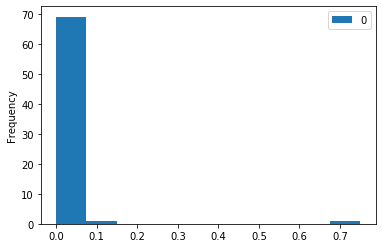

In [311]:
feature_importance.plot(kind='hist')

In [315]:
feature_importance.sort_values(by=0, ascending=False)[:10]

,0
Release Clause,0.750
Overall,0.119
Potential,0.063
RF,0.011
Wage,0.011
Finishing,0.009
Age,0.006
StandingTackle,0.006
Reactions,0.002
LB,0.002


So here we can see that the influence of the "Release Clause" is huge (75%) this is probably bad, because we have an amazing quantity of features, but we only use one... and we have a mean absolute error of 4.1M. Lets going to drop this feature, and train again

In [333]:
X_train_2 = X_train.drop(columns=['Release Clause'])
X_test_2 = X_test.drop(columns=['Release Clause'])

In [339]:
dt_reg_3 = DecisionTreeRegressor(min_samples_split=24, min_samples_leaf=10, max_leaf_nodes=300, random_state=2019)

dt_reg_3.fit(X_train_2, y_train)
predictions = dt_reg_3.predict(X_test_2)
print('MAE in train:', mean_absolute_error(dt_reg_3.predict(X_train_2), y_train))
print('MSE in train:', np.sqrt(mean_squared_error(dt_reg_3.predict(X_train_2), y_train)))
print('MAE in test:', mean_absolute_error(dt_reg_3.predict(X_test_2), y_test))
print('MSE in test:', np.sqrt(mean_squared_error(dt_reg_3.predict(X_test_2), y_test)))

MAE in train: 2657770.5300002075
MSE in train: 7581547.188526211
MAE in test: 3181135.855291353
MSE in test: 9211326.010043936


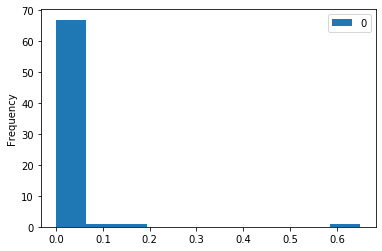

In [340]:
feature_importance_2 = pd.DataFrame(dt_reg_3.feature_importances_, index=X_train_2.columns)
feature_importance_2.plot(kind='hist')

In [341]:
feature_importance_2.sort_values(by=0, ascending=False)[:10]

,0
Overall,0.650
Potential,0.181
Age,0.066
StandingTackle,0.022
LF,0.018
RF,0.013
ST,0.012
CF,0.007
SlidingTackle,0.006
RAM,0.005


Wow our model have improve in MSE an in MAE a 25% that's great! We can see three things of Trees models
 * Don't need standarization, normalization or other feature scaling because the Criterion function create an orde between variables
 * It always have overfitting problems
 * Trees model, create an feature orders and can see the correlations between features, we can see that the majority of the features have coef 0. So normally you don't need to do feature selection till you have 800 features or more
 
If we make an analysis of the residuals, we probably will see that we need to do two models to predict this dataset, one for hight salarys and other for low salarys

# ME QUEDA POR HACER LA REPRESENTACIÓN EN GRAPHVIZ DEL ARBOL en casa

In [354]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [356]:
dot_data = StringIO()
export_graphviz(dt_reg_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_test_2.columns)

In [357]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## 4. Decision Tree Classification
### Parameters that change
* criterion: here are 'gini' or 'entropy', the functión of this hyperparamenter has the same finally than in regression
* class_weight: as the majority of the classification models, the model can infer weights to balace your dataset.
 * balanced: the model compute and balance your classes automatically
 * We can pass a dictionary with the number of the class and their weight

### Dataset
Let create age classes in our dataset

In [18]:
print('Minimun age:', df_football['Age'].min())
print('Maximun age:', df_football['Age'].max())
print('Mean age:', df_football['Age'].mean())

Minimun age: 16.0
Maximun age: 39.0
Mean age: 25.11408804178254


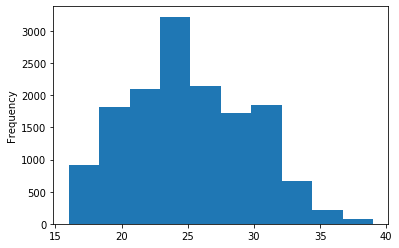

In [19]:
df_football['Age'].plot(kind='hist')

In [41]:
def age_group_creator(age):
    if age <24:
        return 0 #young
    elif age >= 24 and age < 30:
        return 1 #medium age
    else:
        return 2 #old
        
df_football['age_group'] = df_football.apply(lambda x: age_group_creator(x['Age']), axis=1)
df_football

,Name,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,age_group
0,L. Messi,31.0,94.0,94.0,FC Barcelona,1.105e+08,5.65e+07,2202.0,0.0,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2
1,Cristiano Ronaldo,33.0,94.0,94.0,Juventus,7.7e+07,4.05e+07,2228.0,1.0,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2
2,Neymar Jr,26.0,92.0,93.0,Paris Saint-Germain,1.185e+08,2.9e+07,2143.0,1.0,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,1
3,K. De Bruyne,27.0,91.0,92.0,Manchester City,1.02e+08,3.55e+07,2281.0,1.0,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,1
4,E. Hazard,27.0,91.0,91.0,Chelsea,9.3e+07,3.4e+07,2142.0,1.0,4.0,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,1
5,L. Modrić,32.0,91.0,91.0,Real Madrid,6.7e+07,4.2e+07,2280.0,1.0,4.0,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2
6,L. Suárez,31.0,91.0,91.0,FC Barcelona,8e+07,4.55e+07,2346.0,1.0,5.0,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0,2
7,Sergio Ramos,32.0,91.0,91.0,Real Madrid,5.1e+07,3.8e+07,2201.0,1.0,4.0,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2
8,R. Lewandowski,29.0,90.0,90.0,FC Bayern München,7.7e+07,2.05e+07,2152.0,1.0,4.0,...,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0,1
9,T. Kroos,28.0,90.0,90.0,Real Madrid,7.65e+07,3.55e+07,2190.0,1.0,4.0,...,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0,1


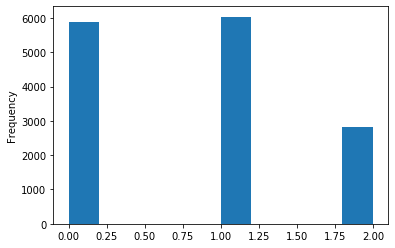

In [42]:
df_football['age_group'].plot(kind='hist')

In [43]:
train, test = train_test_split(df_football, train_size=0.75, test_size=0.25)
X_train = train.drop(columns=['Name', 'Club', 'Position', 'Preferred Foot', 'Age', 'age_group'])
y_train = train[['age_group']]
X_test = test.drop(columns=['Name', 'Club', 'Position', 'Preferred Foot', 'Age', 'age_group'])
y_test = test[['age_group']]

### Classification model

In [62]:
#instance
dt_class = DecisionTreeClassifier()

#train
dt_class.fit(X_train, y_train)

#train preds
preds_train = dt_class.predict(X_train)

#metrics classifications in train
print('CLASSIFICATION IN TRAIN')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_train, y_train))
print()
print('F1 SCORE:\n', f1_score(preds_train, y_train, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_train, y_train))

CLASSIFICATION IN TRAIN

CONFUSION MATRIX:
 [[4425    0    0]
 [   0 4484    0]
 [   0    0 2148]]

F1 SCORE:
 1.0

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4425
           1       1.00      1.00      1.00      4484
           2       1.00      1.00      1.00      2148

    accuracy                           1.00     11057
   macro avg       1.00      1.00      1.00     11057
weighted avg       1.00      1.00      1.00     11057



In [63]:
#Classification in test
preds_trest = dt_class.predict(X_test)

#metrics classifications in train
print('CLASSIFICATION IN TEST')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_trest, y_test))
print()
print('F1 SCORE:\n', f1_score(preds_trest, y_test, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_trest, y_test))

CLASSIFICATION IN TEST

CONFUSION MATRIX:
 [[1297  176    2]
 [ 166 1246  139]
 [   0  128  532]]

F1 SCORE:
 0.8342376559956592

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1475
           1       0.80      0.80      0.80      1551
           2       0.79      0.81      0.80       660

    accuracy                           0.83      3686
   macro avg       0.83      0.83      0.83      3686
weighted avg       0.83      0.83      0.83      3686



In [66]:
pd.DataFrame(dt_class.feature_importances_, index=X_train.columns)[:10]

,0
Overall,0.367791
Potential,0.202897
Value,0.102818
Wage,0.004691
Special,0.005325
International Reputation,0.005191
Weak Foot,0.001004
Skill Moves,0.000478
Height,0.000625
Weight,0.002706


Again our model is overfitting, let introduce some hyperparameters

In [155]:
#instance
dt_class2 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=550)

#train
dt_class2.fit(X_train, y_train)

#train preds
preds_train2 = dt_class2.predict(X_train)

#metrics classifications in train
print('CLASSIFICATION IN TRAIN')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_train2, y_train))
print()
print('F1 SCORE:\n', f1_score(preds_train2, y_train, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_train2, y_train))

CLASSIFICATION IN TRAIN

CONFUSION MATRIX:
 [[4349   92    0]
 [  76 4331    4]
 [   0   61 2144]]

F1 SCORE:
 0.9789273763226916

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4441
           1       0.97      0.98      0.97      4411
           2       1.00      0.97      0.99      2205

    accuracy                           0.98     11057
   macro avg       0.98      0.98      0.98     11057
weighted avg       0.98      0.98      0.98     11057



In [156]:
#Classification in test
preds_trest2 = dt_class2.predict(X_test)

#metrics classifications in train
print('CLASSIFICATION IN TEST')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_trest2, y_test))
print()
print('F1 SCORE:\n', f1_score(preds_trest2, y_test, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_trest2, y_test))

CLASSIFICATION IN TEST

CONFUSION MATRIX:
 [[1326  138    0]
 [ 135 1295  102]
 [   2  117  571]]

F1 SCORE:
 0.8659793814432989

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1464
           1       0.84      0.85      0.84      1532
           2       0.85      0.83      0.84       690

    accuracy                           0.87      3686
   macro avg       0.86      0.86      0.86      3686
weighted avg       0.87      0.87      0.87      3686



Changing only two hyperparameters we increase our model in 4% of accuracy in test which is great!

In [166]:
pd.DataFrame(dt_class2.feature_importances_, index=X_train.columns)[:10]

,0
Potential,0.178355
Value,0.093481
Wage,0.012534
Special,0.011058
International Reputation,0.014692
Weak Foot,0.002777
Skill Moves,0.000673
Height,0.004797
Weight,0.009800
LS,0.002706


Changing only two hyperparameters we increase our model in 4% of accuracy in test which is great!  

We can see again how the tree is very smart and can select the most important features